### Implement non-linear perceptron algorithm for the classification using Hebbian Learning rule. The dataset (data55.mat) contains 4 features and the last column is the output (class label). You can use hold-out cross-validation (70, 10, and 20%) for the selection of training, validation and test instances. Evaluate accuracy, sensitivity and specificity measures for the evaluation of test instances. (Packages such as keras, tensorflow, pytorch for python and MATLAB deep learning toolbox etc. are not allowed). 

In [ ]:
#import all the necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

In [ ]:
root="/home/subhash/Desktop/spam/nnfl assignment/NNFL Assignment-2"
data=pd.read_excel(os.path.join(root,'data55.xlsx'),header=None)
data=data.to_numpy()
np.random.shuffle(data)
print(data.shape)

(100, 5)


In [ ]:
def onehoten(data):
    y=data[:,-1]
    count=0
    cls=[]
    for insts in range(0,y.shape[0]):
        if y[insts] in cls:
            continue
        else:
            cls.append(y[insts])
    nclasses=len(cls)
    z=np.zeros([y.shape[0],nclasses],dtype=int)
    for insts in range(0,y.shape[0]):
        z[insts,int(y[insts])]=z[insts,int(y[insts])]+1
    return z
        

In [ ]:
def split_classes(data):
    x=np.delete(data,-1,1)
    y=onehoten(data)
    c=[]
    for cls in range(0,y.shape[1]):
        temp=[]
        for insts in range(data.shape[0]):
            if y[insts,cls]==1:
                temp.append(data[insts])
        c.append(np.array(temp))
    return(c)

In [ ]:
def split_train_test(classes,train_perc,valid_perc):
    train=[]
    test=[]
    valid=[]
    train_insts=int(classes[0].shape[0]*train_perc/100)
    valid_insts=int(classes[0].shape[0]*valid_perc/100)
    test_insts=classes[0].shape[0]-(train_insts+valid_insts)
    for cls in range(0,len(classes)):
        np.random.shuffle(classes[cls])
        traintemp=classes[cls][0:train_insts,:]
        train.append(traintemp)
        testtemp=classes[cls][train_insts:(train_insts+test_insts),:]
        test.append(testtemp)
        validtemp=classes[cls][:valid_insts,:]
        valid.append(validtemp)
    train=np.array(train).reshape(((train_insts*2),5))
    valid=np.array(valid).reshape(((valid_insts*2),5))
    np.random.shuffle(train)
    np.random.shuffle(valid)
    test=np.array(test).reshape((int(classes[0].shape[0]*(100-(train_perc+valid_perc))/100*len(classes)),5))
    np.random.shuffle(test)
    return train,test,valid


In [ ]:
def split_x_y(data):
    x=np.delete(data,-1,1)
    x=normalize(x)
    y=data[:,-1]
    return x,y

In [ ]:
def normalize(data):
    for i in range(data.shape[1]):
        temp=data[:,i]
        data[:,i]=(temp-np.mean(temp))/np.std(temp)
    return data

In [ ]:
def wsum(w,x):
    ws=np.dot(w.T,x)
    return ws

In [ ]:
def update_par(w,alpha,y,x):
    for j in range(x.shape[0]):
        delta=alpha*y*x[j]
        w[j]=w[j]+delta
    return w

In [ ]:
def train(data,alpha,epochs):
    classes=split_classes(data)
    train,test,valid=split_train_test(classes,70,10)
    x_train,y_train=split_x_y(train)
    x_train=np.concatenate((x_train,np.ones([x_train.shape[0],1],int)),axis=1)
    x_valid,y_valid=split_x_y(valid)
    x_valid=np.concatenate((x_valid,np.ones([x_valid.shape[0],1],int)),axis=1)
    es=[]
    e_valids=[]
    w=np.zeros([x_train.shape[1],1])
    for ep in range(epochs):
        hs=[]
        e=0
        for insts in range(x_train.shape[0]):
            ws=np.dot(w.T,x_train[insts])
            h=1/(1+np.exp(-ws))
            h=round(float(h))
            e=e+(y_train[insts]-h)**2
            hs.append(h)
            if h!=y_train[insts]:
                w=update_par(w,alpha,y_train[insts],x_train[insts])
            else:
                w=w
        es.append(e)
        h_valid=np.dot(w.T,x_valid.T)
        h_valid=1/(1+np.exp(-h_valid))
        h_valid=[round(float(num)) for num in h_valid[0]]
        e_valid=sum(y_valid-h_valid)**2
        e_valids.append(e_valid)

        
    fig=plt.figure()
    fig.set_figheight(7)
    fig.set_figwidth(7)
    fig.suptitle('Learning Curves', fontsize=20)
    plt.xlabel('Number of Iterations', fontsize=14)
    plt.ylabel('Training loss',fontsize=14)
    plt.plot(range(0,len(es)),es, label = 'Training Set Cost')
    plt.plot(range(0,len(e_valids)),e_valids, label = 'validation Set Cost')
    plt.legend()
    return w,hs,test

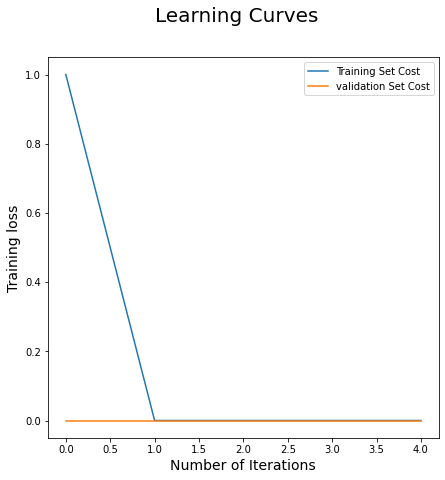

In [ ]:
w,h,test=train(data,0.005,5)

In [ ]:
print(w)

[[ 0.034592  ]
 [-0.00948159]
 [ 0.04658916]
 [ 0.06440234]
 [ 0.05      ]]


In [ ]:
def testf(w,test):
    x_test,y_test=split_x_y(test)
    x_test=np.concatenate((x_test,np.ones([x_test.shape[0],1],int)),axis=1)
    h_test=np.dot(w.T,x_test.T)
    h_test=1/(1+np.exp(-h_test))
    h_test=[round(float(num)) for num in h_test[0]]
    sensitivity=[]
    specificity=[]
    accuracy=[]
    for insts in range(x_test.shape[0]):
        true_pos=0
        true_neg=0
        false_pos=0
        false_neg=0
        for insts in range(0,y_test.shape[0]):
            if (y_test[insts]==1):
                if (h_test[insts]==1):
                    true_pos=true_pos+1
                else:
                    false_neg=false_neg+1
            else:
                if (h_test[insts]==0):
                    true_neg=true_neg+1
                else:
                    false_pos=false_pos+1
    sensitivity.append(true_pos/(true_pos+false_neg))
    specificity.append(true_neg/(true_neg+false_pos))
    accuracy.append((true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
    return sensitivity,specificity,accuracy

In [ ]:
s,d,f=testf(w,test)

In [ ]:
print(s,d,f)

[1.0] [1.0] [1.0]
